In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('SBI.csv')
data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
2661,50,1,30.970,3,0,1,10600.54830,0
2662,18,0,31.920,0,0,0,2205.98080,1
2663,18,0,36.850,0,0,2,1629.83350,1
2664,21,0,25.800,0,0,3,2007.94500,0


In [3]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,39.226182,0.505251,30.670069,1.095274,0.205176,1.515754,13281.369262,0.585896
std,14.051909,0.500066,6.103749,1.205335,0.403906,1.105646,12117.557434,0.492659
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4746.344000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9388.753650,1.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [4]:
import matplotlib.pyplot as plt
plt.boxplot(data['charges'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2c26fc4e808>,
 'caps': [<matplotlib.lines.Line2D at 0x2c26fc4efc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c26fc44c48>],
 'medians': [<matplotlib.lines.Line2D at 0x2c26fc5ca08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c26fc5cac8>],
 'means': []}

In [5]:
data.shape

(2666, 8)

In [6]:
collist=data.columns
ncol=8
nrows=10

In [ ]:
plt.figure(figsize=(5*ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]])
    plt.tight_layout()

In [ ]:
plt.figure(figsize=(5*ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(data[collist[i]],color='blue')

In [ ]:
sns.pairplot(data)

In [7]:
data.skew()

age               0.053203
sex              -0.021018
bmi               0.281929
children          0.938613
smoker            1.460958
region           -0.038197
charges           1.514324
insuranceclaim   -0.348967
dtype: float64

In [8]:
from scipy.stats import zscore

dt=abs(zscore(data))
data_new=data.loc[(dt<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(2666, 8)
(2608, 8)


In [9]:
data_new.skew()

age               0.048796
sex              -0.010743
bmi               0.189383
children          0.737799
smoker            1.478858
region           -0.023068
charges           1.435733
insuranceclaim   -0.355369
dtype: float64

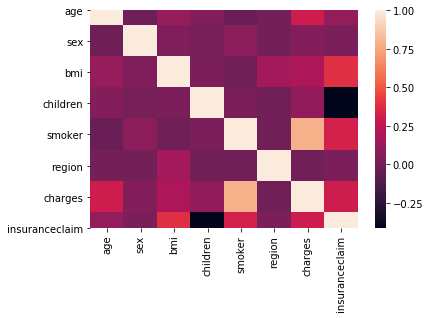

In [12]:
sns.heatmap(data_new.corr())

In [13]:
data_new.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [14]:
for i in data_new.columns:
    if data_new.skew().loc[i]>0.55:
        data_new[i]=np.log(data_new[i])
        
        
print(data_new.skew())

age               0.048796
sex              -0.010743
bmi               0.189383
children               NaN
smoker                 NaN
region           -0.023068
charges          -0.108352
insuranceclaim   -0.355369
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
x=data_new.drop(columns=['insuranceclaim','children','smoker'])
y=data_new[['insuranceclaim']]

print(x.shape)
print(y.shape)

(2608, 5)
(2608, 1)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn.metrics import r2_score,accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [20]:
maxrscr=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    rscr=r2_score(y_test,ypred)
    if rscr>maxrscr:
        maxrscr=rscr
    final=r
print(lr.score(x_train,y_train))
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))
print('for the randon state:',final,'max r2scr is',maxrscr)

from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,x,y,cv=5).mean())

0.7183026584867076
0.691717791411043
[[148 142]
 [ 59 303]]
              precision    recall  f1-score   support

           0       0.71      0.51      0.60       290
           1       0.68      0.84      0.75       362

    accuracy                           0.69       652
   macro avg       0.70      0.67      0.67       652
weighted avg       0.70      0.69      0.68       652

for the randon state: 99 max r2scr is 0
0.7070674323624365


In [21]:
maxrscr=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    ypred1=kn.predict(x_test)
    rscr=r2_score(y_test,ypred1)
    if rscr>maxrscr:
        maxrscr=rscr
    final=r
print(kn.score(x_train,y_train))
print(accuracy_score(y_test,ypred1))
print(confusion_matrix(y_test,ypred1))
print(classification_report(y_test,ypred1))
print('for the randon state:',final,'max r2scr is',maxrscr)

from sklearn.model_selection import cross_val_score
print(cross_val_score(kn,x,y,cv=5).mean())

0.8445807770961146
0.8006134969325154
[[216  74]
 [ 56 306]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       290
           1       0.81      0.85      0.82       362

    accuracy                           0.80       652
   macro avg       0.80      0.80      0.80       652
weighted avg       0.80      0.80      0.80       652

for the randon state: 99 max r2scr is 0.19264216575922566
0.8029089628045691


In [22]:
maxrscr=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    ypred2=gnb.predict(x_test)
    rscr=r2_score(y_test,ypred2)
    if rscr>maxrscr:
        maxrscr=rscr
    final=r
print(gnb.score(x_train,y_train))
print(accuracy_score(y_test,ypred2))
print(confusion_matrix(y_test,ypred2))
print(classification_report(y_test,ypred2))
print('for the randon state:',final,'max r2scr is',maxrscr)

from sklearn.model_selection import cross_val_score
print(cross_val_score(gnb,x,y,cv=5).mean())

fpr, tpr, thresholds = roc_curve(y_test,ypred2)
roc_auc = auc(fpr, tpr)
roc_auc

0.745398773006135
0.7162576687116564
[[171 119]
 [ 66 296]]
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       290
           1       0.71      0.82      0.76       362

    accuracy                           0.72       652
   macro avg       0.72      0.70      0.71       652
weighted avg       0.72      0.72      0.71       652

for the randon state: 99 max r2scr is 0.07523012631959702
0.7354354139257139


0.7036673652124215

In [23]:
maxrscr=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    ypred3=dtc.predict(x_test)
    rscr=r2_score(y_test,ypred3)
    if rscr>maxrscr:
        maxrscr=rscr
    final=r
print(dtc.score(x_train,y_train))
print(accuracy_score(y_test,ypred3))
print(confusion_matrix(y_test,ypred3))
print(classification_report(y_test,ypred3))
print('for the randon state:',final,'max r2scr is',maxrscr)

from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc,x,y,cv=5).mean())

1.0
0.9570552147239264
[[275  15]
 [ 13 349]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       290
           1       0.96      0.96      0.96       362

    accuracy                           0.96       652
   macro avg       0.96      0.96      0.96       652
weighted avg       0.96      0.96      0.96       652

for the randon state: 99 max r2scr is 0.897511470030554
0.9996175908221797


In [24]:
maxrscr=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    svc=SVC()
    svc.fit(x_train,y_train)
    ypred4=svc.predict(x_test)
    rscr=r2_score(y_test,ypred4)
    if rscr>maxrscr:
        maxrscr=rscr
    final=r
print(svc.score(x_train,y_train))
print(accuracy_score(y_test,ypred4))
print(confusion_matrix(y_test,ypred4))
print(classification_report(y_test,ypred4))
print('for the randon state:',final,'max r2scr is',maxrscr)

from sklearn.model_selection import cross_val_score
print(cross_val_score(svc,x,y,cv=5).mean())

0.8921267893660532
0.8251533742331288
[[207  83]
 [ 31 331]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       290
           1       0.80      0.91      0.85       362

    accuracy                           0.83       652
   macro avg       0.83      0.81      0.82       652
weighted avg       0.83      0.83      0.82       652

for the randon state: 99 max r2scr is 0.34193687469990497
0.8401024420476695


In [25]:
# the max r2_score of Decession Tree Classifier is 0.89 and the cross_val_score is 0.99
from sklearn.externals import joblib
joblib.dump(dtc,'SBI.pk1')

['SBI.pk1']